## Initializing NewsApiClient with API Key

In [1]:
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key='6681a13517fe4af5b0977eb8eea7ed8d')

## Importing Libraries

In [2]:
# importing pandas, numpy, regression package.
import pandas as pd
import numpy as np
import re 

## Retrieving Top Headlines Related to "Baltimore Bridge" in English

In [3]:
# Get top headlines related to world in English
top_headlines = newsapi.get_top_headlines(q='Baltimore bridge', language='en')

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    print()  # Empty line for readability
print(top_headlines)

Title: How the Baltimore Bridge collapse could impact the environment - The Washington Post
Source: The Washington Post
Published At: 2024-03-30T13:00:00Z
Description: Containers carrying hazardous materials were damaged. There is a sheen in the water. Recovery work runs the risk of stirring up toxic sediments.
URL: https://www.washingtonpost.com/climate-environment/2024/03/30/baltimore-bridge-environment-pollution-hazardous-materials/

Title: Joe Biden is set to visit Baltimore after Key Bridge collapse: ‘We’re with you’ - Hindustan Times
Source: Hindustan Times
Published At: 2024-03-30T07:31:46Z
Description: President Biden pledges support and $60 million in federal funding for Baltimore after Francis Scott Key Bridge collapse.
URL: https://www.hindustantimes.com/world-news/us-news/joe-biden-is-set-to-visit-baltimore-after-key-bridge-collapse-we-re-with-you-101711774458875.html

Title: Baltimore bridge collapse: 'Racist' cartoon on Dali ship's Indian crew sparks outrage - Moneycontro

## Text Summarizing Article Description

In [4]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

# Extract the description
description = article['description']
    
# Preprocess the text (if needed)
# Here, we'll directly use the description for summarization
    
# Apply text summarization
parser = PlaintextParser.from_string(description, Tokenizer("english"))
summarizer = LsaSummarizer()
summary = summarizer(parser.document, sentences_count=2)  # Adjust the number of sentences as needed
    
# Print the summary
print("Summary:")
for sentence in summary:
    print(sentence)
    
print()  # Empty line for readability

print(top_headlines)

Summary:
The cartoon was slammed by social media users not only for its racist depiction of Indians, but also for showing the crew in a poor light especially when the President of the US, Joe Biden, and Maryland governor Wes Moore praised them for their prompt action …

{'status': 'ok', 'totalResults': 4, 'articles': [{'source': {'id': 'the-washington-post', 'name': 'The Washington Post'}, 'author': 'Nicolás Rivero', 'title': 'How the Baltimore Bridge collapse could impact the environment - The Washington Post', 'description': 'Containers carrying hazardous materials were damaged. There is a sheen in the water. Recovery work runs the risk of stirring up toxic sediments.', 'url': 'https://www.washingtonpost.com/climate-environment/2024/03/30/baltimore-bridge-environment-pollution-hazardous-materials/', 'urlToImage': 'https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/TMGCTMVMDI5I4QP4ZSZSVXTBE4.jpg&w=1440', 'published

## Extracting and Text Summarizing Top Headlines Articles

In [5]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    
    # Extract the description
    description = article['description']
    
    # Preprocess the text (if needed)
    # Here, we'll directly use the description for summarization
    
    # Apply text summarization
    parser = PlaintextParser.from_string(description, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count=2)  # Adjust the number of sentences as needed
    
    # Print the summary
    print("Summary:")
    for sentence in summary:
        print(sentence)
    print()  # Empty line for readability

print(top_headlines)

Title: How the Baltimore Bridge collapse could impact the environment - The Washington Post
Source: The Washington Post
Published At: 2024-03-30T13:00:00Z
Description: Containers carrying hazardous materials were damaged. There is a sheen in the water. Recovery work runs the risk of stirring up toxic sediments.
URL: https://www.washingtonpost.com/climate-environment/2024/03/30/baltimore-bridge-environment-pollution-hazardous-materials/
Summary:
There is a sheen in the water.
Recovery work runs the risk of stirring up toxic sediments.

Title: Joe Biden is set to visit Baltimore after Key Bridge collapse: ‘We’re with you’ - Hindustan Times
Source: Hindustan Times
Published At: 2024-03-30T07:31:46Z
Description: President Biden pledges support and $60 million in federal funding for Baltimore after Francis Scott Key Bridge collapse.
URL: https://www.hindustantimes.com/world-news/us-news/joe-biden-is-set-to-visit-baltimore-after-key-bridge-collapse-we-re-with-you-101711774458875.html
Summary

## LDA Model

In [6]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from gensim import corpora, models

# Define the number of topics
num_topics = 10

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    
    # Extract the description
    description = article['description']
    
    # Apply text summarization
    parser = PlaintextParser.from_string(description, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count=2)  # Adjust the number of sentences as needed
    
    # Print the summary
    print("Summary:")
    for sentence in summary:
        print(sentence)
    print()  # Empty line for readability
    
    # Perform LDA for topic modeling
    # Tokenize the description
    tokens = description.split()
    
    # Create a dictionary from the tokens
    dictionary = corpora.Dictionary([tokens])
    
    # Create a corpus from the dictionary
    corpus = [dictionary.doc2bow(tokens)]
    
    # Apply LDA model
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    
    # Print the topics
    print("Topics:")
    for topic in lda_model.print_topics():
        print(topic)
    print()  # Empty line for readability

print(top_headlines)

Title: How the Baltimore Bridge collapse could impact the environment - The Washington Post
Source: The Washington Post
Published At: 2024-03-30T13:00:00Z
Description: Containers carrying hazardous materials were damaged. There is a sheen in the water. Recovery work runs the risk of stirring up toxic sediments.
URL: https://www.washingtonpost.com/climate-environment/2024/03/30/baltimore-bridge-environment-pollution-hazardous-materials/
Summary:
There is a sheen in the water.
Recovery work runs the risk of stirring up toxic sediments.

Topics:
(0, '0.045*"the" + 0.045*"were" + 0.045*"Containers" + 0.045*"Recovery" + 0.045*"risk" + 0.045*"sediments." + 0.045*"is" + 0.045*"damaged." + 0.045*"in" + 0.045*"runs"')
(1, '0.045*"the" + 0.045*"Recovery" + 0.045*"sediments." + 0.045*"were" + 0.045*"up" + 0.045*"of" + 0.045*"is" + 0.045*"Containers" + 0.045*"damaged." + 0.045*"sheen"')
(2, '0.045*"the" + 0.045*"sediments." + 0.045*"damaged." + 0.045*"Recovery" + 0.045*"is" + 0.045*"in" + 0.045*"r

## Visualizing Topic Model with pyLDAvis

In [7]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Assuming lda_model, corpus, and dictionary are already defined

# Prepare the visualization
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(lda_display)

## Word Clouds for Topics Extracted from News Article Descriptions using LDA

Title: How the Baltimore Bridge collapse could impact the environment - The Washington Post
Source: The Washington Post
Published At: 2024-03-30T13:00:00Z
Description: Containers carrying hazardous materials were damaged. There is a sheen in the water. Recovery work runs the risk of stirring up toxic sediments.
URL: https://www.washingtonpost.com/climate-environment/2024/03/30/baltimore-bridge-environment-pollution-hazardous-materials/
Summary:
There is a sheen in the water.
Recovery work runs the risk of stirring up toxic sediments.

Topics for num_topics=1:
(0, '0.067*"the" + 0.044*"risk" + 0.044*"of" + 0.044*"Recovery" + 0.044*"water." + 0.044*"were" + 0.044*"hazardous" + 0.044*"damaged." + 0.044*"is" + 0.044*"sediments."')



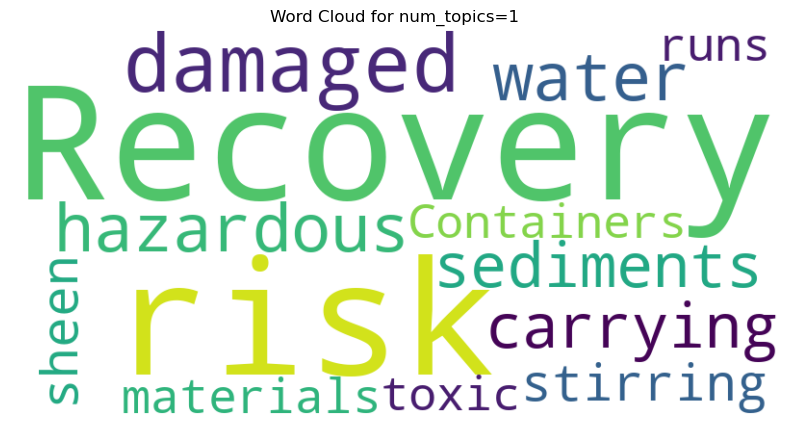

Topics for num_topics=2:
(0, '0.054*"the" + 0.050*"Containers" + 0.050*"is" + 0.048*"sheen" + 0.048*"toxic" + 0.047*"risk" + 0.046*"carrying" + 0.046*"of" + 0.046*"stirring" + 0.046*"up"')
(1, '0.075*"the" + 0.048*"hazardous" + 0.047*"materials" + 0.046*"damaged." + 0.045*"runs" + 0.045*"in" + 0.045*"were" + 0.045*"water." + 0.045*"sediments." + 0.045*"There"')



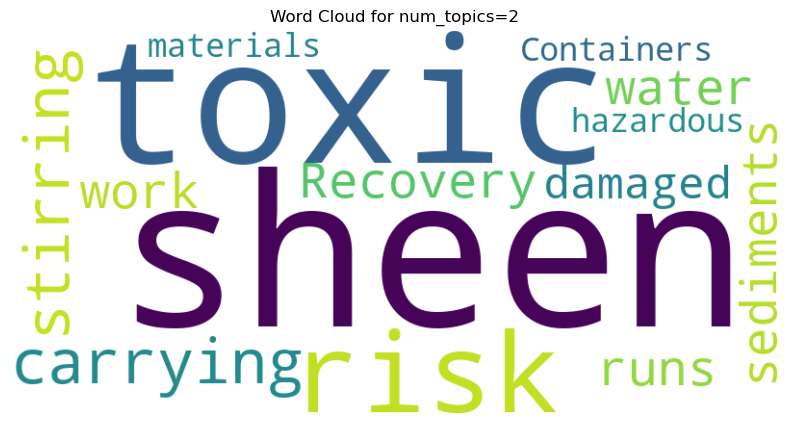

Topics for num_topics=3:
(0, '0.063*"the" + 0.053*"stirring" + 0.050*"runs" + 0.049*"materials" + 0.048*"hazardous" + 0.045*"work" + 0.045*"up" + 0.045*"is" + 0.045*"sheen" + 0.045*"There"')
(1, '0.070*"the" + 0.048*"a" + 0.048*"damaged." + 0.048*"Containers" + 0.047*"carrying" + 0.047*"of" + 0.045*"were" + 0.045*"water." + 0.045*"There" + 0.044*"work"')
(2, '0.065*"the" + 0.049*"toxic" + 0.049*"Recovery" + 0.048*"water." + 0.048*"sheen" + 0.047*"sediments." + 0.046*"in" + 0.046*"were" + 0.046*"hazardous" + 0.045*"materials"')



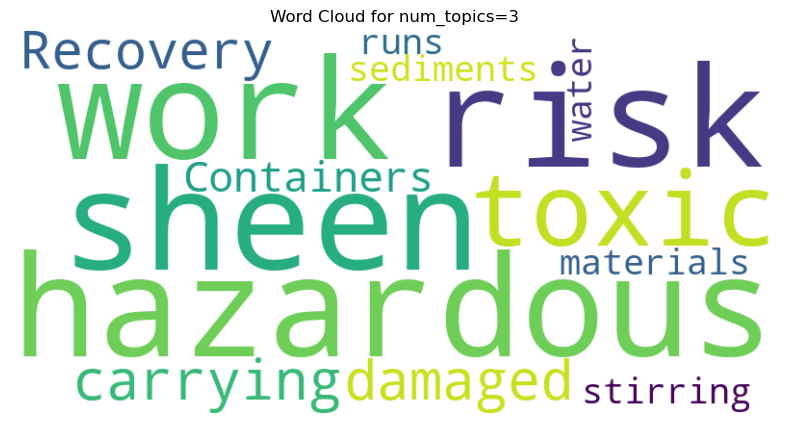

Topics for num_topics=4:
(0, '0.074*"the" + 0.050*"There" + 0.048*"of" + 0.047*"Containers" + 0.047*"is" + 0.047*"work" + 0.046*"damaged." + 0.046*"toxic" + 0.046*"sheen" + 0.045*"water."')
(1, '0.073*"the" + 0.049*"Recovery" + 0.049*"in" + 0.047*"up" + 0.047*"were" + 0.046*"sediments." + 0.046*"carrying" + 0.046*"stirring" + 0.046*"a" + 0.045*"runs"')
(2, '0.049*"the" + 0.047*"damaged." + 0.046*"toxic" + 0.046*"runs" + 0.046*"up" + 0.046*"water." + 0.046*"in" + 0.046*"a" + 0.045*"risk" + 0.045*"sheen"')
(3, '0.049*"the" + 0.048*"stirring" + 0.048*"were" + 0.047*"of" + 0.047*"There" + 0.047*"runs" + 0.046*"Containers" + 0.046*"water." + 0.046*"up" + 0.045*"a"')



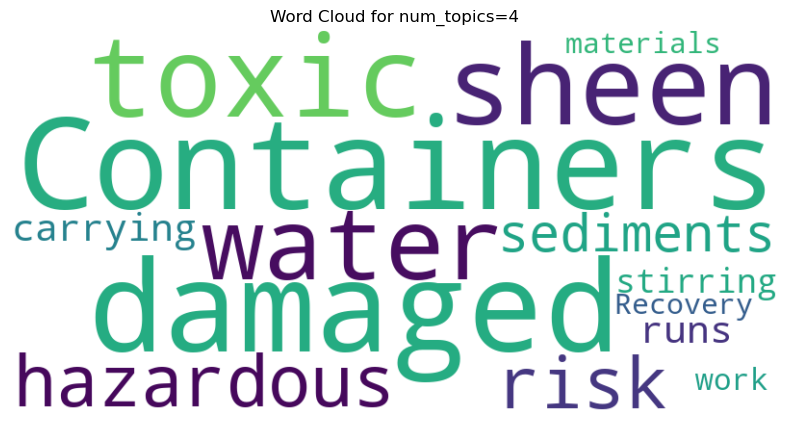

Topics for num_topics=5:
(0, '0.045*"the" + 0.045*"There" + 0.045*"in" + 0.045*"toxic" + 0.045*"risk" + 0.045*"carrying" + 0.045*"stirring" + 0.045*"water." + 0.045*"up" + 0.045*"Recovery"')
(1, '0.046*"the" + 0.045*"up" + 0.045*"There" + 0.045*"sediments." + 0.045*"stirring" + 0.045*"hazardous" + 0.045*"Recovery" + 0.045*"in" + 0.045*"water." + 0.045*"work"')
(2, '0.080*"the" + 0.044*"carrying" + 0.044*"materials" + 0.044*"risk" + 0.044*"were" + 0.044*"is" + 0.044*"damaged." + 0.044*"hazardous" + 0.044*"toxic" + 0.044*"runs"')
(3, '0.049*"the" + 0.047*"water." + 0.047*"There" + 0.047*"up" + 0.047*"sediments." + 0.046*"in" + 0.046*"work" + 0.046*"sheen" + 0.046*"of" + 0.046*"Recovery"')
(4, '0.045*"There" + 0.045*"sediments." + 0.045*"the" + 0.045*"toxic" + 0.045*"water." + 0.045*"in" + 0.045*"Recovery" + 0.045*"is" + 0.045*"up" + 0.045*"risk"')



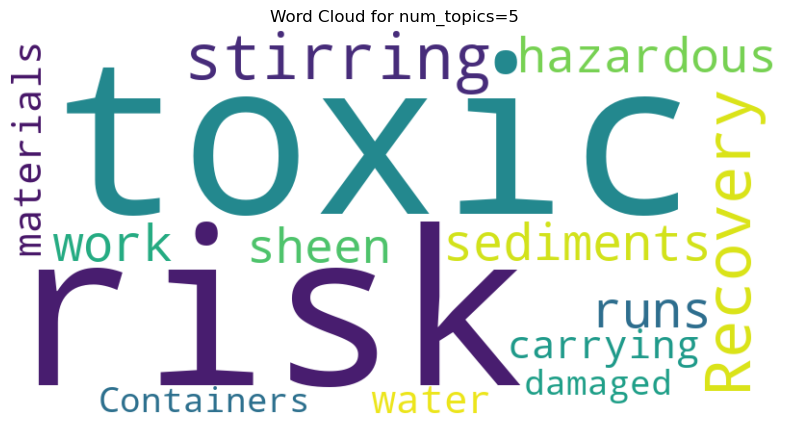

Topics for num_topics=6:
(0, '0.045*"in" + 0.045*"Containers" + 0.045*"were" + 0.045*"stirring" + 0.045*"water." + 0.045*"a" + 0.045*"of" + 0.045*"carrying" + 0.045*"hazardous" + 0.045*"sheen"')
(1, '0.045*"the" + 0.045*"is" + 0.045*"of" + 0.045*"There" + 0.045*"runs" + 0.045*"were" + 0.045*"Containers" + 0.045*"up" + 0.045*"damaged." + 0.045*"in"')
(2, '0.046*"the" + 0.046*"Containers" + 0.046*"were" + 0.046*"a" + 0.045*"sheen" + 0.045*"sediments." + 0.045*"water." + 0.045*"up" + 0.045*"stirring" + 0.045*"in"')
(3, '0.081*"the" + 0.046*"risk" + 0.045*"Recovery" + 0.045*"up" + 0.045*"toxic" + 0.045*"There" + 0.045*"in" + 0.045*"is" + 0.044*"materials" + 0.044*"sediments."')
(4, '0.064*"the" + 0.058*"were" + 0.050*"a" + 0.049*"stirring" + 0.049*"Containers" + 0.047*"hazardous" + 0.047*"carrying" + 0.047*"runs" + 0.045*"of" + 0.045*"sheen"')
(5, '0.045*"the" + 0.045*"is" + 0.045*"were" + 0.045*"toxic" + 0.045*"a" + 0.045*"Containers" + 0.045*"up" + 0.045*"sediments." + 0.045*"sheen" + 0.

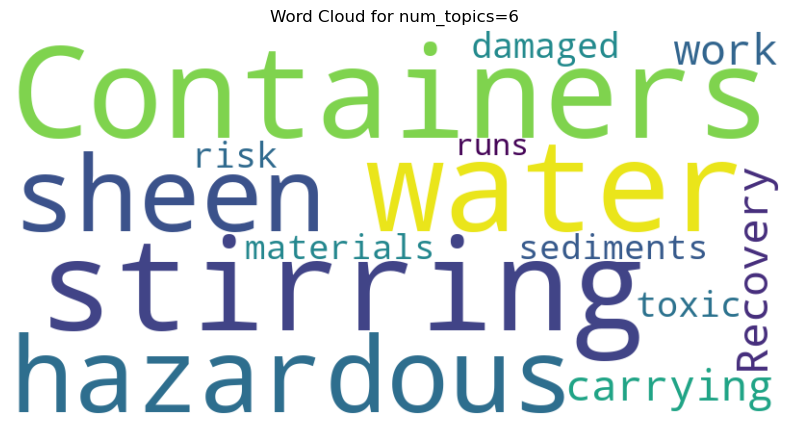

Topics for num_topics=7:
(0, '0.045*"the" + 0.045*"stirring" + 0.045*"sheen" + 0.045*"There" + 0.045*"toxic" + 0.045*"in" + 0.045*"runs" + 0.045*"hazardous" + 0.045*"risk" + 0.045*"damaged."')
(1, '0.086*"the" + 0.053*"carrying" + 0.047*"runs" + 0.046*"up" + 0.046*"work" + 0.046*"in" + 0.045*"hazardous" + 0.045*"stirring" + 0.045*"toxic" + 0.045*"sheen"')
(2, '0.045*"the" + 0.045*"materials" + 0.045*"runs" + 0.045*"stirring" + 0.045*"Recovery" + 0.045*"a" + 0.045*"up" + 0.045*"damaged." + 0.045*"carrying" + 0.045*"sheen"')
(3, '0.056*"the" + 0.051*"There" + 0.051*"of" + 0.050*"in" + 0.050*"toxic" + 0.047*"runs" + 0.047*"stirring" + 0.046*"risk" + 0.046*"a" + 0.045*"water."')
(4, '0.045*"the" + 0.045*"Recovery" + 0.045*"stirring" + 0.045*"runs" + 0.045*"There" + 0.045*"a" + 0.045*"of" + 0.045*"sediments." + 0.045*"risk" + 0.045*"carrying"')
(5, '0.045*"the" + 0.045*"a" + 0.045*"damaged." + 0.045*"of" + 0.045*"risk" + 0.045*"Recovery" + 0.045*"stirring" + 0.045*"materials" + 0.045*"sheen

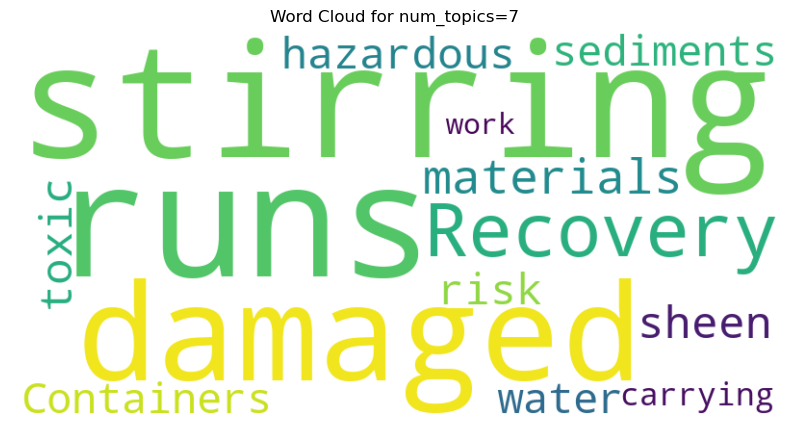

Topics for num_topics=8:
(0, '0.045*"the" + 0.045*"sheen" + 0.045*"a" + 0.045*"There" + 0.045*"carrying" + 0.045*"in" + 0.045*"is" + 0.045*"Containers" + 0.045*"work" + 0.045*"water."')
(1, '0.045*"the" + 0.045*"in" + 0.045*"There" + 0.045*"up" + 0.045*"stirring" + 0.045*"materials" + 0.045*"were" + 0.045*"a" + 0.045*"carrying" + 0.045*"is"')
(2, '0.045*"the" + 0.045*"materials" + 0.045*"sediments." + 0.045*"damaged." + 0.045*"a" + 0.045*"sheen" + 0.045*"up" + 0.045*"work" + 0.045*"Recovery" + 0.045*"runs"')
(3, '0.045*"stirring" + 0.045*"the" + 0.045*"materials" + 0.045*"in" + 0.045*"a" + 0.045*"up" + 0.045*"runs" + 0.045*"Recovery" + 0.045*"is" + 0.045*"damaged."')
(4, '0.045*"the" + 0.045*"materials" + 0.045*"up" + 0.045*"work" + 0.045*"carrying" + 0.045*"stirring" + 0.045*"toxic" + 0.045*"There" + 0.045*"Recovery" + 0.045*"sheen"')
(5, '0.045*"the" + 0.045*"up" + 0.045*"work" + 0.045*"There" + 0.045*"water." + 0.045*"a" + 0.045*"Containers" + 0.045*"materials" + 0.045*"damaged." + 

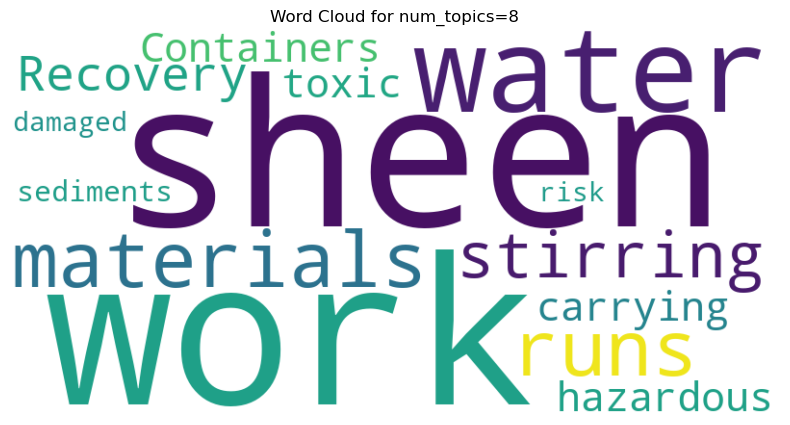

Topics for num_topics=9:
(0, '0.083*"the" + 0.049*"toxic" + 0.047*"stirring" + 0.047*"hazardous" + 0.046*"of" + 0.045*"water." + 0.045*"were" + 0.045*"Containers" + 0.045*"damaged." + 0.045*"sheen"')
(1, '0.045*"the" + 0.045*"a" + 0.045*"work" + 0.045*"There" + 0.045*"risk" + 0.045*"in" + 0.045*"materials" + 0.045*"runs" + 0.045*"damaged." + 0.045*"up"')
(2, '0.045*"the" + 0.045*"damaged." + 0.045*"risk" + 0.045*"materials" + 0.045*"Containers" + 0.045*"Recovery" + 0.045*"carrying" + 0.045*"in" + 0.045*"a" + 0.045*"up"')
(3, '0.045*"the" + 0.045*"risk" + 0.045*"Recovery" + 0.045*"carrying" + 0.045*"work" + 0.045*"damaged." + 0.045*"of" + 0.045*"a" + 0.045*"up" + 0.045*"in"')
(4, '0.073*"the" + 0.056*"a" + 0.053*"Recovery" + 0.051*"work" + 0.050*"carrying" + 0.050*"in" + 0.049*"materials" + 0.048*"sediments." + 0.046*"runs" + 0.043*"There"')
(5, '0.045*"the" + 0.045*"a" + 0.045*"carrying" + 0.045*"runs" + 0.045*"risk" + 0.045*"materials" + 0.045*"damaged." + 0.045*"up" + 0.045*"work" + 

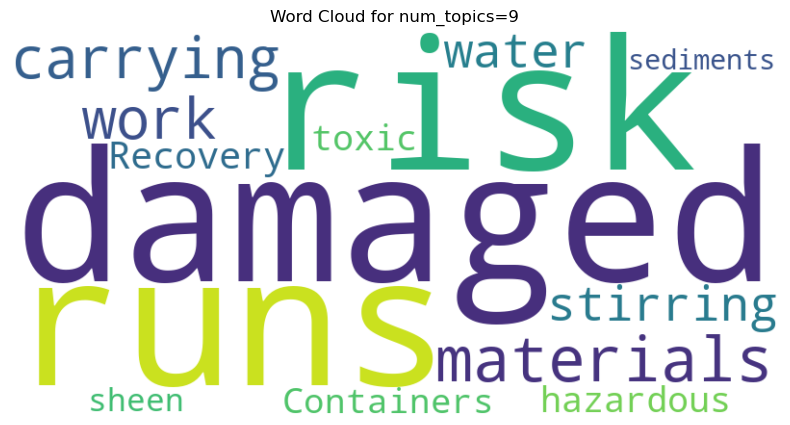

Topics for num_topics=10:
(0, '0.045*"the" + 0.045*"materials" + 0.045*"Recovery" + 0.045*"hazardous" + 0.045*"up" + 0.045*"toxic" + 0.045*"runs" + 0.045*"Containers" + 0.045*"were" + 0.045*"work"')
(1, '0.077*"the" + 0.052*"damaged." + 0.048*"up" + 0.046*"runs" + 0.046*"is" + 0.046*"There" + 0.045*"materials" + 0.045*"stirring" + 0.045*"in" + 0.044*"risk"')
(2, '0.045*"the" + 0.045*"There" + 0.045*"work" + 0.045*"Containers" + 0.045*"runs" + 0.045*"toxic" + 0.045*"hazardous" + 0.045*"stirring" + 0.045*"of" + 0.045*"were"')
(3, '0.045*"the" + 0.045*"of" + 0.045*"risk" + 0.045*"runs" + 0.045*"There" + 0.045*"were" + 0.045*"stirring" + 0.045*"work" + 0.045*"up" + 0.045*"damaged."')
(4, '0.086*"the" + 0.056*"were" + 0.050*"work" + 0.049*"Recovery" + 0.048*"hazardous" + 0.047*"Containers" + 0.045*"sheen" + 0.045*"water." + 0.044*"a" + 0.044*"sediments."')
(5, '0.045*"the" + 0.045*"work" + 0.045*"There" + 0.045*"hazardous" + 0.045*"were" + 0.045*"sediments." + 0.045*"up" + 0.045*"of" + 0.04

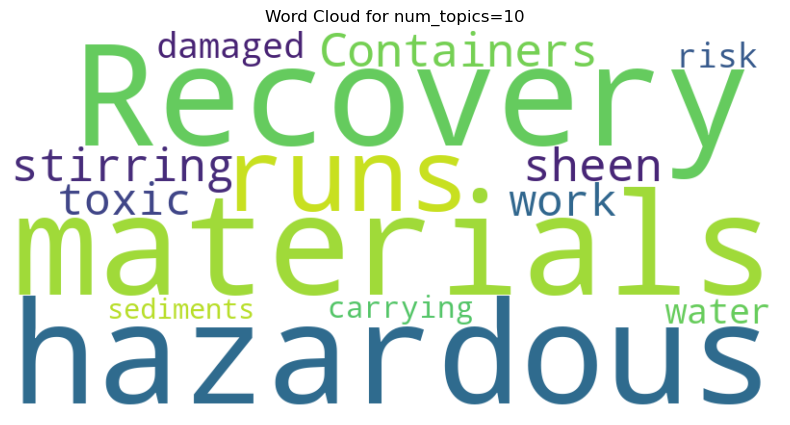

Title: Joe Biden is set to visit Baltimore after Key Bridge collapse: ‘We’re with you’ - Hindustan Times
Source: Hindustan Times
Published At: 2024-03-30T07:31:46Z
Description: President Biden pledges support and $60 million in federal funding for Baltimore after Francis Scott Key Bridge collapse.
URL: https://www.hindustantimes.com/world-news/us-news/joe-biden-is-set-to-visit-baltimore-after-key-bridge-collapse-we-re-with-you-101711774458875.html
Summary:
President Biden pledges support and $60 million in federal funding for Baltimore after Francis Scott Key Bridge collapse.

Topics for num_topics=1:
(0, '0.056*"Bridge" + 0.056*"funding" + 0.056*"pledges" + 0.056*"and" + 0.056*"Scott" + 0.056*"in" + 0.056*"for" + 0.056*"President" + 0.056*"Key" + 0.056*"Baltimore"')



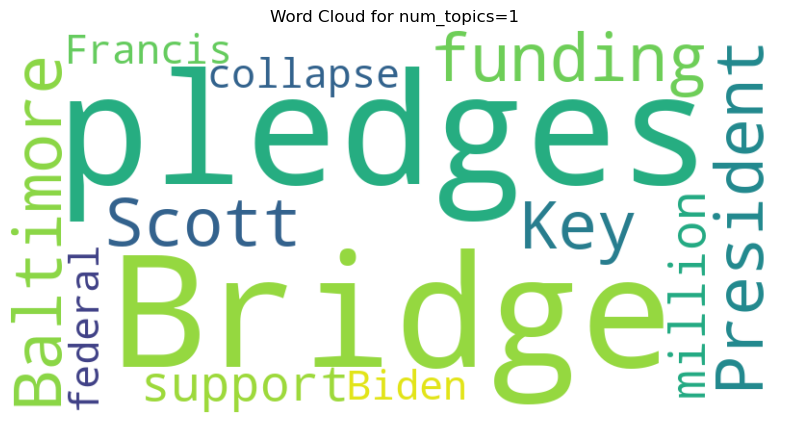

Topics for num_topics=2:
(0, '0.062*"federal" + 0.060*"$60" + 0.059*"Biden" + 0.057*"President" + 0.057*"support" + 0.057*"Bridge" + 0.056*"Francis" + 0.056*"funding" + 0.056*"collapse." + 0.056*"after"')
(1, '0.058*"Scott" + 0.058*"for" + 0.058*"and" + 0.057*"Baltimore" + 0.057*"in" + 0.057*"pledges" + 0.056*"million" + 0.056*"Key" + 0.056*"after" + 0.055*"collapse."')



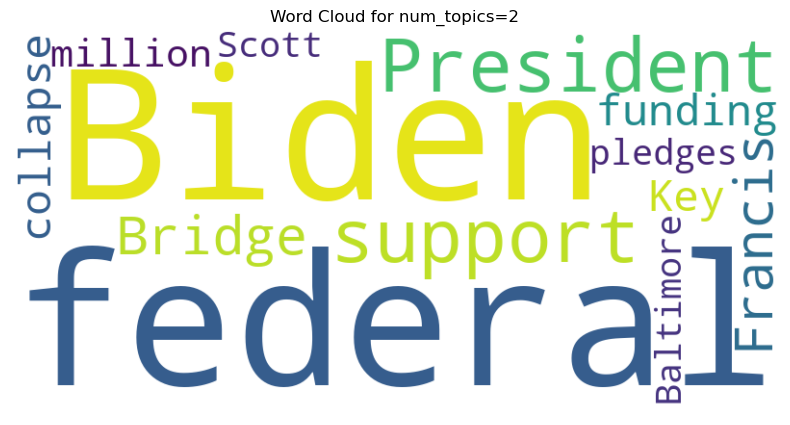

Topics for num_topics=3:
(0, '0.064*"funding" + 0.063*"Scott" + 0.063*"Baltimore" + 0.059*"after" + 0.058*"President" + 0.057*"federal" + 0.057*"Francis" + 0.057*"million" + 0.056*"Biden" + 0.056*"for"')
(1, '0.057*"after" + 0.057*"Bridge" + 0.057*"million" + 0.056*"in" + 0.056*"Scott" + 0.056*"Baltimore" + 0.056*"support" + 0.056*"funding" + 0.055*"for" + 0.055*"Key"')
(2, '0.062*"Key" + 0.062*"and" + 0.061*"collapse." + 0.058*"support" + 0.058*"pledges" + 0.057*"Bridge" + 0.056*"$60" + 0.056*"in" + 0.056*"Biden" + 0.056*"for"')



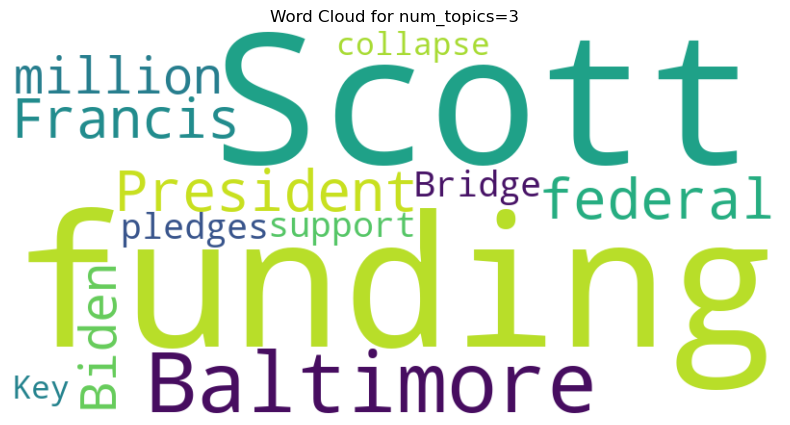

Topics for num_topics=4:
(0, '0.056*"for" + 0.056*"Biden" + 0.056*"collapse." + 0.056*"$60" + 0.056*"million" + 0.056*"Scott" + 0.056*"after" + 0.056*"in" + 0.056*"President" + 0.056*"Bridge"')
(1, '0.066*"for" + 0.057*"federal" + 0.057*"Baltimore" + 0.056*"collapse." + 0.056*"Key" + 0.056*"Bridge" + 0.056*"Scott" + 0.056*"after" + 0.055*"President" + 0.055*"pledges"')
(2, '0.056*"Francis" + 0.056*"million" + 0.056*"and" + 0.056*"support" + 0.056*"in" + 0.056*"$60" + 0.056*"pledges" + 0.056*"funding" + 0.056*"federal" + 0.056*"Biden"')
(3, '0.058*"for" + 0.058*"President" + 0.057*"Scott" + 0.057*"Biden" + 0.056*"after" + 0.056*"Bridge" + 0.055*"Baltimore" + 0.055*"support" + 0.055*"Key" + 0.055*"and"')



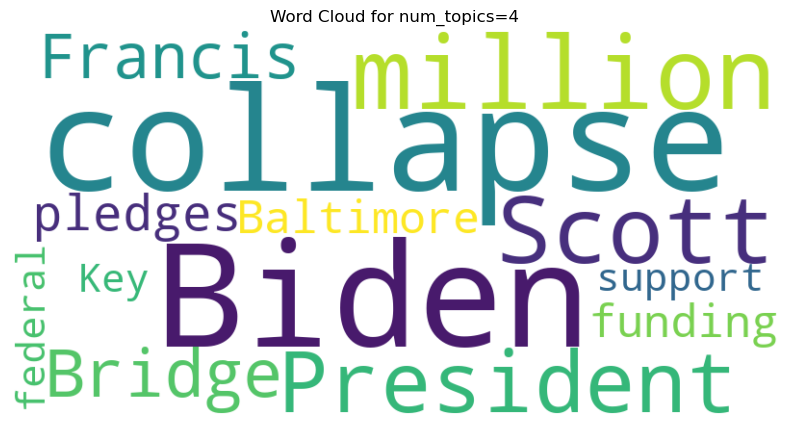

Topics for num_topics=5:
(0, '0.065*"after" + 0.062*"President" + 0.061*"$60" + 0.060*"Biden" + 0.059*"pledges" + 0.059*"and" + 0.058*"collapse." + 0.057*"federal" + 0.056*"Scott" + 0.056*"Key"')
(1, '0.056*"$60" + 0.056*"pledges" + 0.056*"support" + 0.056*"federal" + 0.056*"Biden" + 0.056*"President" + 0.056*"Baltimore" + 0.056*"collapse." + 0.056*"funding" + 0.056*"Key"')
(2, '0.056*"Key" + 0.056*"support" + 0.056*"$60" + 0.056*"Biden" + 0.056*"after" + 0.056*"pledges" + 0.056*"Scott" + 0.056*"Bridge" + 0.056*"federal" + 0.056*"Baltimore"')
(3, '0.060*"pledges" + 0.060*"President" + 0.059*"$60" + 0.057*"funding" + 0.057*"Baltimore" + 0.056*"after" + 0.056*"support" + 0.056*"collapse." + 0.055*"in" + 0.055*"federal"')
(4, '0.063*"for" + 0.059*"Baltimore" + 0.058*"million" + 0.058*"funding" + 0.058*"in" + 0.057*"Bridge" + 0.056*"Francis" + 0.056*"support" + 0.056*"Scott" + 0.056*"Key"')



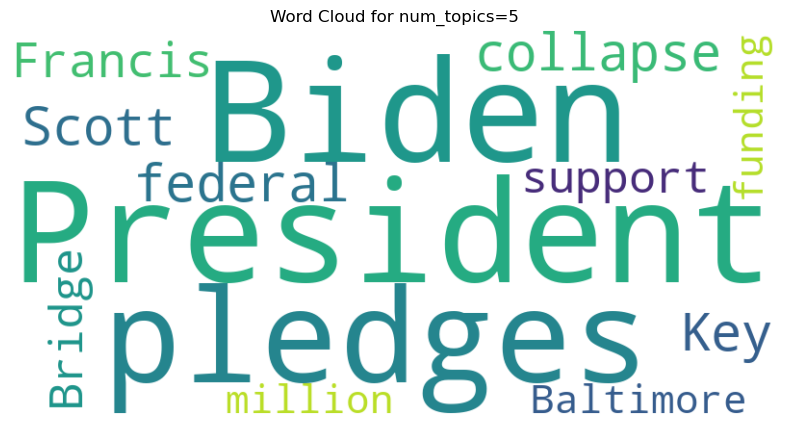

Topics for num_topics=6:
(0, '0.056*"and" + 0.056*"Baltimore" + 0.056*"$60" + 0.056*"Key" + 0.056*"million" + 0.056*"funding" + 0.056*"President" + 0.056*"pledges" + 0.056*"support" + 0.056*"Biden"')
(1, '0.074*"and" + 0.063*"million" + 0.062*"Scott" + 0.060*"President" + 0.058*"Key" + 0.057*"in" + 0.057*"$60" + 0.057*"support" + 0.056*"federal" + 0.055*"Francis"')
(2, '0.060*"funding" + 0.060*"Baltimore" + 0.059*"Bridge" + 0.058*"after" + 0.058*"Biden" + 0.058*"pledges" + 0.058*"collapse." + 0.057*"for" + 0.056*"Francis" + 0.055*"federal"')
(3, '0.056*"for" + 0.056*"Key" + 0.056*"million" + 0.056*"Biden" + 0.056*"and" + 0.056*"federal" + 0.056*"support" + 0.056*"$60" + 0.056*"funding" + 0.056*"Francis"')
(4, '0.056*"Biden" + 0.056*"Francis" + 0.056*"$60" + 0.056*"Key" + 0.056*"funding" + 0.056*"million" + 0.056*"federal" + 0.056*"collapse." + 0.056*"pledges" + 0.056*"for"')
(5, '0.056*"$60" + 0.056*"funding" + 0.056*"million" + 0.056*"pledges" + 0.056*"Biden" + 0.056*"support" + 0.056

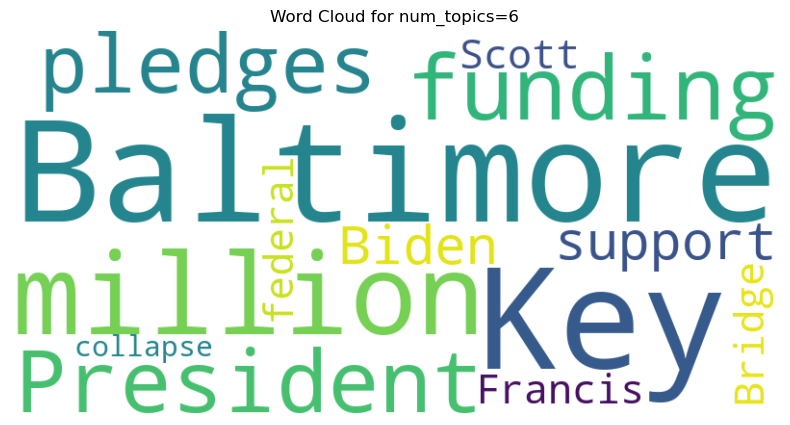

Topics for num_topics=7:
(0, '0.056*"for" + 0.056*"Scott" + 0.056*"federal" + 0.056*"million" + 0.056*"collapse." + 0.056*"Biden" + 0.056*"$60" + 0.056*"Baltimore" + 0.056*"Francis" + 0.056*"in"')
(1, '0.056*"after" + 0.056*"pledges" + 0.056*"President" + 0.056*"Key" + 0.056*"funding" + 0.056*"Bridge" + 0.056*"Francis" + 0.056*"and" + 0.056*"support" + 0.056*"million"')
(2, '0.056*"collapse." + 0.056*"for" + 0.056*"Scott" + 0.056*"support" + 0.056*"$60" + 0.056*"in" + 0.056*"Bridge" + 0.056*"President" + 0.056*"Francis" + 0.056*"federal"')
(3, '0.056*"for" + 0.056*"collapse." + 0.056*"$60" + 0.056*"federal" + 0.056*"Baltimore" + 0.056*"Scott" + 0.056*"in" + 0.056*"Key" + 0.056*"Bridge" + 0.056*"million"')
(4, '0.056*"for" + 0.056*"in" + 0.056*"Biden" + 0.056*"collapse." + 0.056*"federal" + 0.056*"support" + 0.056*"$60" + 0.056*"Baltimore" + 0.056*"Scott" + 0.056*"and"')
(5, '0.056*"collapse." + 0.056*"$60" + 0.056*"Biden" + 0.056*"and" + 0.056*"President" + 0.056*"Baltimore" + 0.056*"S

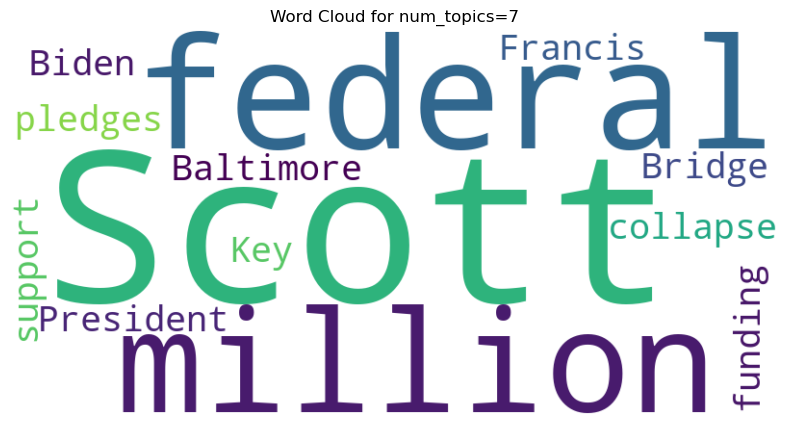

Topics for num_topics=8:
(0, '0.056*"support" + 0.056*"Biden" + 0.056*"$60" + 0.056*"Francis" + 0.056*"pledges" + 0.056*"in" + 0.056*"Key" + 0.056*"collapse." + 0.056*"Baltimore" + 0.056*"million"')
(1, '0.056*"support" + 0.056*"pledges" + 0.056*"and" + 0.056*"Baltimore" + 0.056*"Francis" + 0.056*"Biden" + 0.056*"collapse." + 0.056*"Key" + 0.056*"for" + 0.056*"in"')
(2, '0.056*"pledges" + 0.056*"Francis" + 0.056*"support" + 0.056*"in" + 0.056*"$60" + 0.056*"federal" + 0.056*"funding" + 0.056*"Biden" + 0.056*"Baltimore" + 0.056*"and"')
(3, '0.056*"support" + 0.056*"Francis" + 0.056*"pledges" + 0.056*"funding" + 0.056*"Baltimore" + 0.056*"in" + 0.056*"million" + 0.056*"after" + 0.056*"Bridge" + 0.056*"Key"')
(4, '0.056*"support" + 0.056*"Bridge" + 0.056*"Francis" + 0.056*"$60" + 0.056*"Scott" + 0.056*"million" + 0.056*"and" + 0.056*"federal" + 0.056*"funding" + 0.056*"Baltimore"')
(5, '0.056*"support" + 0.056*"Francis" + 0.056*"million" + 0.056*"Baltimore" + 0.056*"$60" + 0.056*"Key" + 0

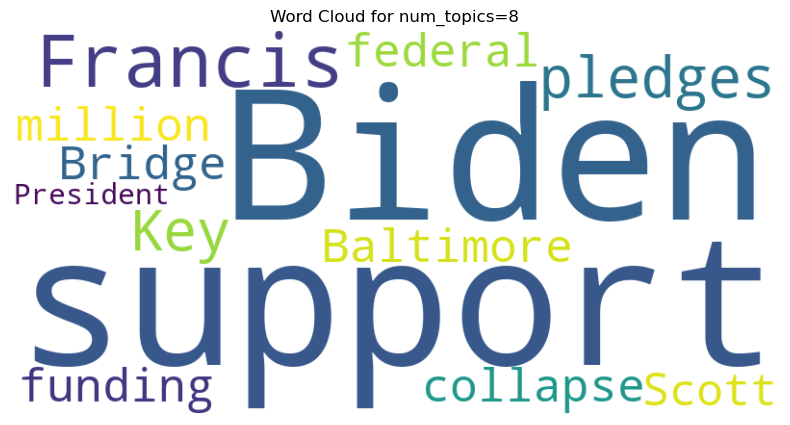

Topics for num_topics=9:
(0, '0.056*"collapse." + 0.056*"and" + 0.056*"Key" + 0.056*"pledges" + 0.056*"Biden" + 0.056*"support" + 0.056*"federal" + 0.056*"$60" + 0.056*"after" + 0.056*"million"')
(1, '0.056*"collapse." + 0.056*"$60" + 0.056*"and" + 0.056*"President" + 0.056*"Key" + 0.056*"after" + 0.056*"federal" + 0.056*"Baltimore" + 0.056*"funding" + 0.056*"million"')
(2, '0.068*"President" + 0.065*"for" + 0.062*"$60" + 0.061*"federal" + 0.060*"pledges" + 0.057*"in" + 0.056*"million" + 0.055*"and" + 0.055*"Francis" + 0.055*"Key"')
(3, '0.067*"and" + 0.061*"pledges" + 0.060*"Baltimore" + 0.059*"President" + 0.057*"Key" + 0.057*"collapse." + 0.057*"$60" + 0.056*"in" + 0.056*"after" + 0.055*"support"')
(4, '0.056*"federal" + 0.056*"pledges" + 0.056*"in" + 0.056*"$60" + 0.056*"collapse." + 0.056*"Key" + 0.056*"for" + 0.056*"President" + 0.056*"support" + 0.056*"Baltimore"')
(5, '0.061*"Bridge" + 0.058*"funding" + 0.058*"collapse." + 0.058*"Biden" + 0.058*"Francis" + 0.057*"Scott" + 0.057

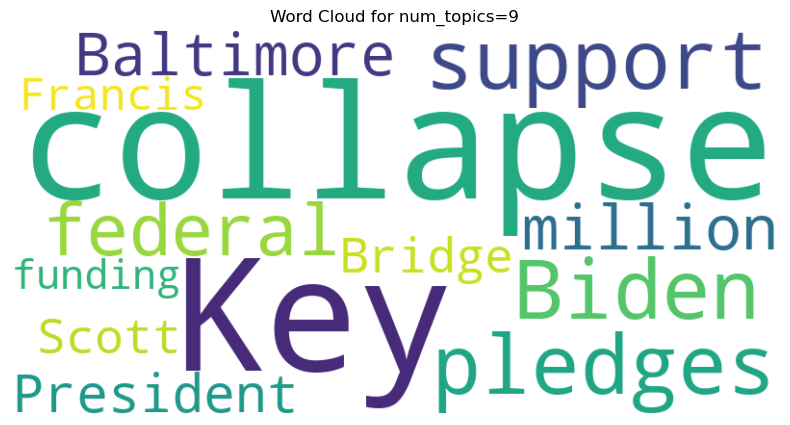

Topics for num_topics=10:
(0, '0.056*"in" + 0.056*"Bridge" + 0.056*"President" + 0.056*"for" + 0.056*"after" + 0.056*"funding" + 0.056*"Baltimore" + 0.056*"Key" + 0.056*"and" + 0.056*"federal"')
(1, '0.056*"in" + 0.056*"support" + 0.056*"Baltimore" + 0.056*"President" + 0.056*"and" + 0.056*"for" + 0.056*"million" + 0.056*"collapse." + 0.056*"$60" + 0.056*"Scott"')
(2, '0.056*"Bridge" + 0.056*"in" + 0.056*"and" + 0.056*"President" + 0.056*"federal" + 0.056*"Francis" + 0.056*"funding" + 0.056*"$60" + 0.056*"for" + 0.056*"collapse."')
(3, '0.056*"in" + 0.056*"support" + 0.056*"Bridge" + 0.056*"Scott" + 0.056*"Baltimore" + 0.056*"pledges" + 0.056*"President" + 0.056*"funding" + 0.056*"$60" + 0.056*"after"')
(4, '0.056*"in" + 0.056*"Bridge" + 0.056*"President" + 0.056*"for" + 0.056*"funding" + 0.056*"Key" + 0.056*"million" + 0.056*"Scott" + 0.056*"support" + 0.056*"after"')
(5, '0.056*"in" + 0.056*"support" + 0.056*"pledges" + 0.056*"Baltimore" + 0.056*"federal" + 0.056*"million" + 0.056*"K

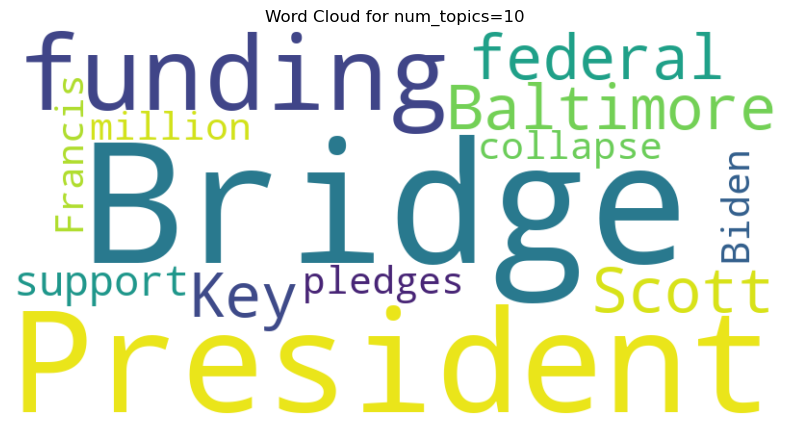

Title: Baltimore bridge collapse: 'Racist' cartoon on Dali ship's Indian crew sparks outrage - Moneycontrol
Source: Moneycontrol
Published At: 2024-03-28T10:18:10Z
Description: The cartoon was slammed by social media users not only for its racist depiction of Indians, but also for showing the crew in a poor light especially when the President of the US, Joe Biden, and Maryland governor Wes Moore praised them for their prompt action …
URL: https://www.moneycontrol.com/news/trends/baltimore-bridge-collapse-racist-cartoon-on-indian-crew-on-dali-ship-sparks-outrage-12537131.html
Summary:
The cartoon was slammed by social media users not only for its racist depiction of Indians, but also for showing the crew in a poor light especially when the President of the US, Joe Biden, and Maryland governor Wes Moore praised them for their prompt action …

Topics for num_topics=1:
(0, '0.045*"the" + 0.045*"for" + 0.034*"of" + 0.022*"was" + 0.022*"crew" + 0.022*"Joe" + 0.022*"Indians," + 0.022*"action"

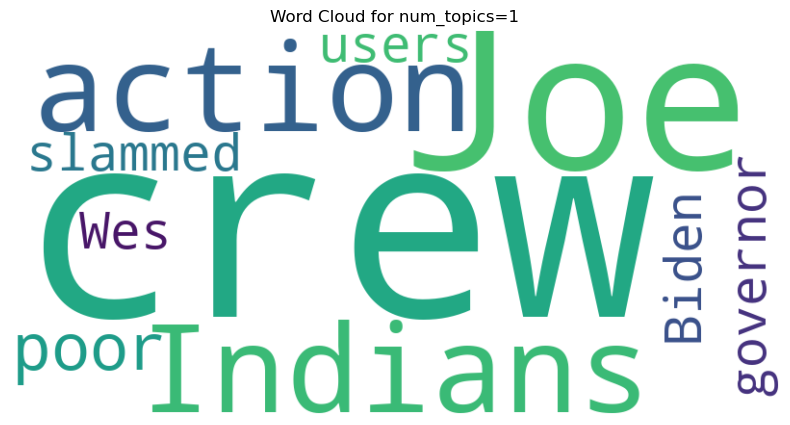

Topics for num_topics=2:
(0, '0.042*"for" + 0.039*"of" + 0.035*"the" + 0.025*"light" + 0.025*"social" + 0.025*"Joe" + 0.024*"users" + 0.024*"not" + 0.024*"also" + 0.024*"Wes"')
(1, '0.053*"the" + 0.047*"for" + 0.030*"of" + 0.025*"media" + 0.025*"Maryland" + 0.024*"a" + 0.024*"poor" + 0.023*"Indians," + 0.023*"cartoon" + 0.023*"only"')



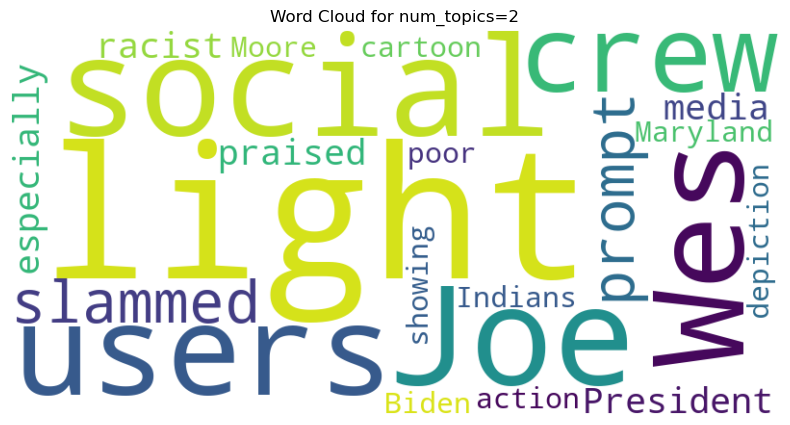

Topics for num_topics=3:
(0, '0.051*"the" + 0.043*"for" + 0.033*"of" + 0.025*"by" + 0.024*"when" + 0.024*"President" + 0.024*"also" + 0.024*"Indians," + 0.024*"its" + 0.024*"social"')
(1, '0.044*"for" + 0.036*"the" + 0.030*"of" + 0.025*"racist" + 0.025*"US," + 0.025*"users" + 0.025*"was" + 0.024*"cartoon" + 0.024*"Biden," + 0.024*"slammed"')
(2, '0.048*"for" + 0.045*"the" + 0.038*"of" + 0.025*"Moore" + 0.024*"depiction" + 0.024*"not" + 0.024*"Biden," + 0.024*"Maryland" + 0.024*"their" + 0.023*"Joe"')



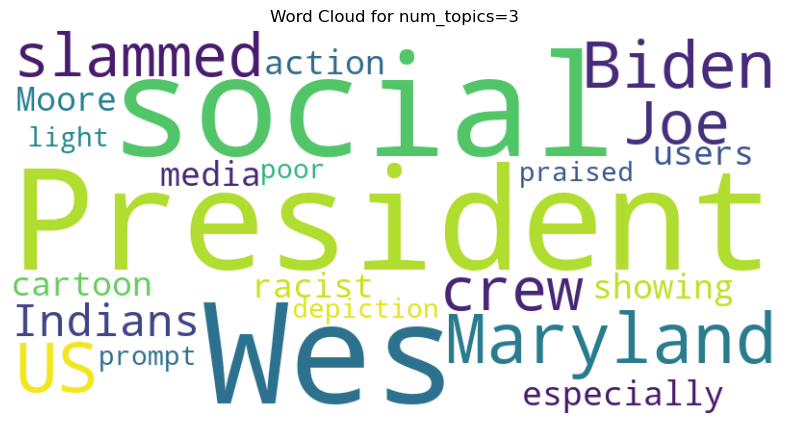

Topics for num_topics=4:
(0, '0.044*"for" + 0.033*"the" + 0.027*"of" + 0.025*"only" + 0.025*"prompt" + 0.025*"depiction" + 0.025*"…" + 0.025*"crew" + 0.024*"Moore" + 0.024*"but"')
(1, '0.048*"the" + 0.044*"for" + 0.042*"of" + 0.026*"them" + 0.026*"crew" + 0.025*"in" + 0.025*"light" + 0.025*"depiction" + 0.024*"was" + 0.024*"and"')
(2, '0.056*"the" + 0.053*"for" + 0.032*"of" + 0.025*"but" + 0.025*"their" + 0.025*"slammed" + 0.025*"a" + 0.025*"not" + 0.024*"racist" + 0.024*"…"')
(3, '0.024*"for" + 0.024*"the" + 0.024*"Maryland" + 0.024*"by" + 0.024*"them" + 0.024*"in" + 0.024*"only" + 0.024*"of" + 0.024*"slammed" + 0.024*"Biden,"')



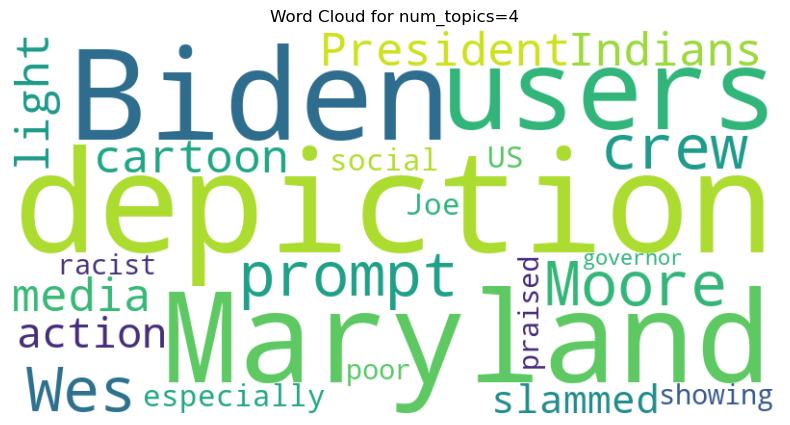

Topics for num_topics=5:
(0, '0.024*"the" + 0.024*"for" + 0.024*"of" + 0.024*"slammed" + 0.024*"when" + 0.024*"Maryland" + 0.024*"action" + 0.024*"users" + 0.024*"The" + 0.024*"was"')
(1, '0.042*"for" + 0.036*"the" + 0.033*"of" + 0.027*"when" + 0.026*"but" + 0.025*"governor" + 0.025*"slammed" + 0.025*"Moore" + 0.024*"President" + 0.024*"depiction"')
(2, '0.055*"the" + 0.047*"for" + 0.036*"of" + 0.026*"not" + 0.026*"and" + 0.025*"only" + 0.025*"Maryland" + 0.025*"The" + 0.025*"their" + 0.024*"crew"')
(3, '0.024*"for" + 0.024*"of" + 0.024*"the" + 0.024*"when" + 0.024*"social" + 0.024*"depiction" + 0.024*"them" + 0.024*"only" + 0.024*"media" + 0.024*"poor"')
(4, '0.056*"for" + 0.053*"the" + 0.038*"of" + 0.026*"media" + 0.024*"was" + 0.024*"action" + 0.024*"in" + 0.024*"its" + 0.024*"especially" + 0.024*"users"')



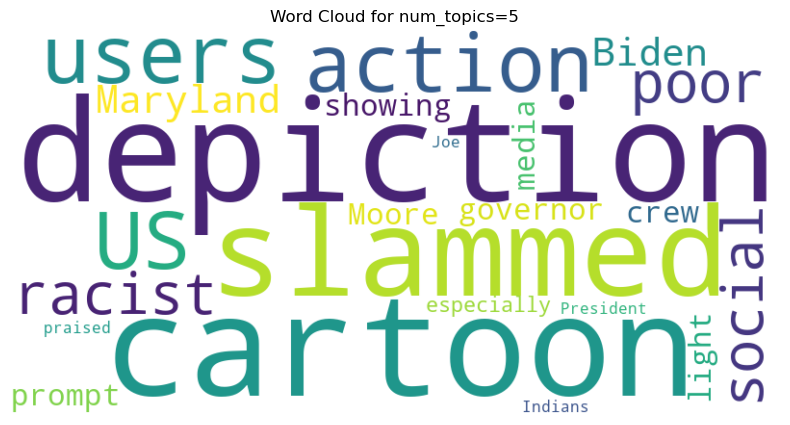

Topics for num_topics=6:
(0, '0.024*"of" + 0.024*"for" + 0.024*"the" + 0.024*"crew" + 0.024*"The" + 0.024*"cartoon" + 0.024*"when" + 0.024*"showing" + 0.024*"racist" + 0.024*"a"')
(1, '0.024*"for" + 0.024*"of" + 0.024*"the" + 0.024*"showing" + 0.024*"poor" + 0.024*"slammed" + 0.024*"crew" + 0.024*"when" + 0.024*"only" + 0.024*"by"')
(2, '0.027*"for" + 0.027*"the" + 0.027*"of" + 0.026*"crew" + 0.025*"in" + 0.025*"their" + 0.024*"not" + 0.024*"and" + 0.024*"when" + 0.024*"Maryland"')
(3, '0.061*"the" + 0.060*"for" + 0.039*"of" + 0.024*"social" + 0.023*"Joe" + 0.023*"US," + 0.023*"action" + 0.022*"governor" + 0.022*"especially" + 0.022*"Moore"')
(4, '0.038*"the" + 0.037*"for" + 0.031*"of" + 0.027*"slammed" + 0.026*"light" + 0.026*"poor" + 0.025*"media" + 0.025*"Maryland" + 0.025*"crew" + 0.025*"when"')
(5, '0.035*"for" + 0.033*"of" + 0.031*"the" + 0.028*"crew" + 0.027*"its" + 0.026*"them" + 0.025*"when" + 0.025*"depiction" + 0.025*"in" + 0.025*"their"')



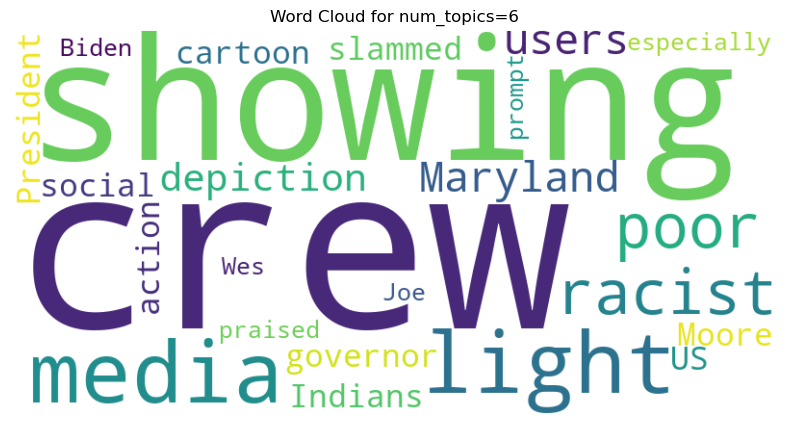

Topics for num_topics=7:
(0, '0.035*"the" + 0.033*"for" + 0.032*"of" + 0.026*"racist" + 0.025*"governor" + 0.025*"not" + 0.025*"crew" + 0.024*"prompt" + 0.024*"Wes" + 0.024*"cartoon"')
(1, '0.024*"the" + 0.024*"of" + 0.024*"for" + 0.024*"users" + 0.024*"was" + 0.024*"not" + 0.024*"US," + 0.024*"action" + 0.024*"Biden," + 0.024*"showing"')
(2, '0.056*"for" + 0.052*"the" + 0.039*"of" + 0.026*"light" + 0.025*"in" + 0.025*"Biden," + 0.025*"poor" + 0.024*"users" + 0.024*"US," + 0.024*"a"')
(3, '0.024*"of" + 0.024*"for" + 0.024*"the" + 0.024*"cartoon" + 0.024*"their" + 0.024*"action" + 0.024*"praised" + 0.024*"slammed" + 0.024*"when" + 0.024*"not"')
(4, '0.059*"the" + 0.055*"for" + 0.037*"of" + 0.025*"slammed" + 0.025*"Joe" + 0.025*"Wes" + 0.024*"The" + 0.024*"only" + 0.024*"showing" + 0.024*"action"')
(5, '0.033*"for" + 0.030*"the" + 0.028*"of" + 0.025*"praised" + 0.025*"a" + 0.025*"only" + 0.025*"Wes" + 0.025*"prompt" + 0.025*"social" + 0.025*"not"')
(6, '0.024*"for" + 0.024*"the" + 0.024*

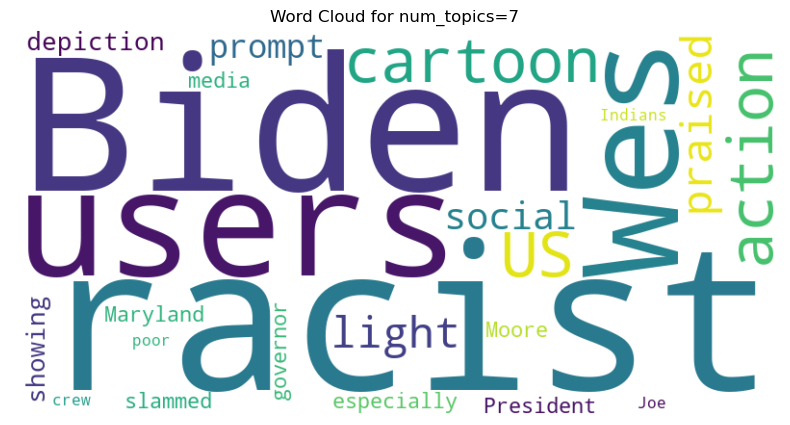

Topics for num_topics=8:
(0, '0.030*"for" + 0.029*"the" + 0.027*"of" + 0.027*"light" + 0.027*"action" + 0.026*"crew" + 0.025*"…" + 0.025*"users" + 0.025*"praised" + 0.024*"Maryland"')
(1, '0.024*"the" + 0.024*"for" + 0.024*"light" + 0.024*"The" + 0.024*"…" + 0.024*"them" + 0.024*"prompt" + 0.024*"US," + 0.024*"especially" + 0.024*"but"')
(2, '0.024*"the" + 0.024*"for" + 0.024*"light" + 0.024*"action" + 0.024*"…" + 0.024*"crew" + 0.024*"a" + 0.024*"especially" + 0.024*"them" + 0.024*"in"')
(3, '0.024*"the" + 0.024*"for" + 0.024*"light" + 0.024*"action" + 0.024*"especially" + 0.024*"of" + 0.024*"in" + 0.024*"cartoon" + 0.024*"…" + 0.024*"praised"')
(4, '0.024*"the" + 0.024*"of" + 0.024*"for" + 0.024*"action" + 0.024*"poor" + 0.024*"in" + 0.024*"but" + 0.024*"crew" + 0.024*"The" + 0.024*"light"')
(5, '0.024*"for" + 0.024*"the" + 0.024*"but" + 0.024*"light" + 0.024*"of" + 0.024*"The" + 0.024*"poor" + 0.024*"Maryland" + 0.024*"…" + 0.024*"their"')
(6, '0.024*"for" + 0.024*"the" + 0.024*"of"

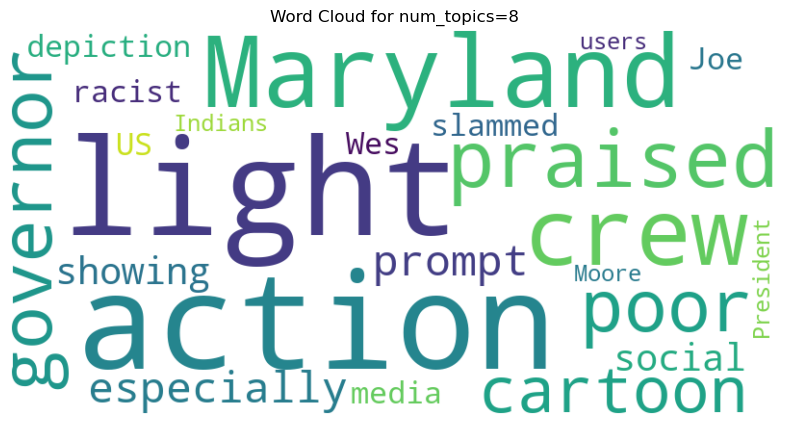

Topics for num_topics=9:
(0, '0.024*"for" + 0.024*"the" + 0.024*"governor" + 0.024*"their" + 0.024*"of" + 0.024*"in" + 0.024*"also" + 0.024*"Moore" + 0.024*"was" + 0.024*"cartoon"')
(1, '0.062*"the" + 0.052*"for" + 0.047*"of" + 0.024*"cartoon" + 0.024*"crew" + 0.024*"racist" + 0.024*"Joe" + 0.023*"…" + 0.023*"when" + 0.023*"poor"')
(2, '0.045*"for" + 0.036*"the" + 0.028*"of" + 0.026*"governor" + 0.026*"Moore" + 0.025*"poor" + 0.025*"was" + 0.025*"in" + 0.025*"light" + 0.025*"users"')
(3, '0.024*"the" + 0.024*"for" + 0.024*"of" + 0.024*"also" + 0.024*"light" + 0.024*"The" + 0.024*"poor" + 0.024*"action" + 0.024*"racist" + 0.024*"them"')
(4, '0.024*"the" + 0.024*"for" + 0.024*"of" + 0.024*"Moore" + 0.024*"poor" + 0.024*"showing" + 0.024*"media" + 0.024*"also" + 0.024*"and" + 0.024*"…"')
(5, '0.024*"for" + 0.024*"the" + 0.024*"of" + 0.024*"poor" + 0.024*"governor" + 0.024*"was" + 0.024*"Maryland" + 0.024*"also" + 0.024*"social" + 0.024*"but"')
(6, '0.024*"for" + 0.024*"the" + 0.024*"of" +

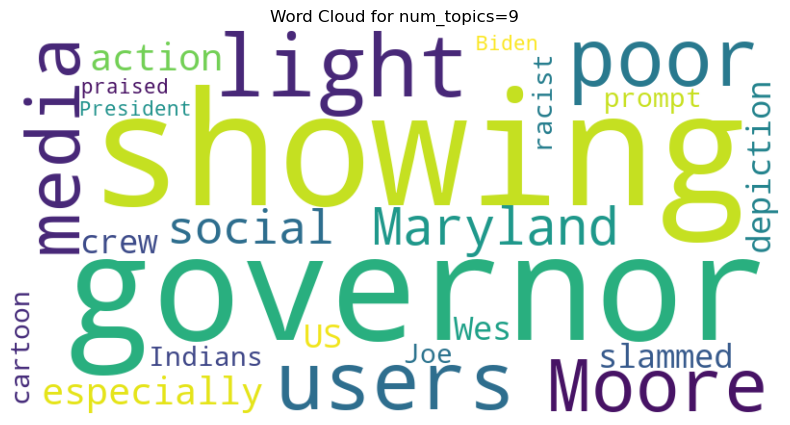

Topics for num_topics=10:
(0, '0.029*"the" + 0.027*"of" + 0.026*"for" + 0.025*"not" + 0.024*"Biden," + 0.024*"a" + 0.024*"The" + 0.024*"only" + 0.024*"governor" + 0.024*"media"')
(1, '0.024*"the" + 0.024*"for" + 0.024*"of" + 0.024*"Biden," + 0.024*"media" + 0.024*"not" + 0.024*"…" + 0.024*"their" + 0.024*"crew" + 0.024*"depiction"')
(2, '0.065*"for" + 0.052*"the" + 0.038*"of" + 0.027*"President" + 0.025*"The" + 0.024*"praised" + 0.024*"users" + 0.024*"depiction" + 0.024*"especially" + 0.024*"US,"')
(3, '0.024*"the" + 0.024*"for" + 0.024*"of" + 0.024*"and" + 0.024*"but" + 0.024*"them" + 0.024*"only" + 0.024*"showing" + 0.024*"its" + 0.024*"their"')
(4, '0.033*"the" + 0.032*"for" + 0.029*"of" + 0.025*"only" + 0.025*"…" + 0.025*"showing" + 0.025*"governor" + 0.025*"their" + 0.025*"was" + 0.024*"US,"')
(5, '0.024*"the" + 0.024*"for" + 0.024*"of" + 0.024*"not" + 0.024*"depiction" + 0.024*"Wes" + 0.024*"media" + 0.024*"only" + 0.024*"Biden," + 0.024*"when"')
(6, '0.064*"the" + 0.050*"for" + 

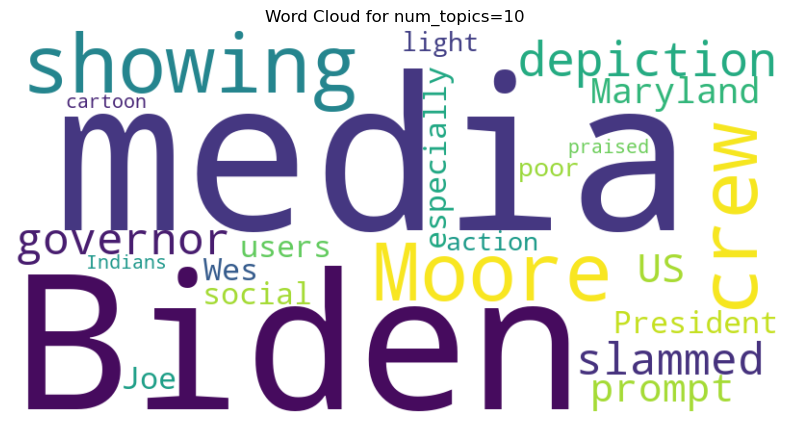

{'status': 'ok', 'totalResults': 4, 'articles': [{'source': {'id': 'the-washington-post', 'name': 'The Washington Post'}, 'author': 'Nicolás Rivero', 'title': 'How the Baltimore Bridge collapse could impact the environment - The Washington Post', 'description': 'Containers carrying hazardous materials were damaged. There is a sheen in the water. Recovery work runs the risk of stirring up toxic sediments.', 'url': 'https://www.washingtonpost.com/climate-environment/2024/03/30/baltimore-bridge-environment-pollution-hazardous-materials/', 'urlToImage': 'https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/TMGCTMVMDI5I4QP4ZSZSVXTBE4.jpg&w=1440', 'publishedAt': '2024-03-30T13:00:00Z', 'content': 'Return to menuThe Key Bridge collapsed amid a decades-long effort to clean up industrial pollution in the Chesapeake Bay and the Patapsco River.\r\nThis watershed and Baltimores waterways have been pla… [+1272 chars]'}, {'source':

In [8]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from gensim import corpora, models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the number of topics
num_topics = [1,2,3,4,5,6,7,8,9,10]  # Example: You can specify multiple numbers of topics to explore

# Extracting information from each article in the response
for article in top_headlines['articles']:
    print("Title:", article['title'])
    print("Source:", article['source']['name'])
    print("Published At:", article['publishedAt'])
    print("Description:", article['description'])
    print("URL:", article['url'])
    
    # Extract the description
    description = article['description']
    
    # Apply text summarization
    parser = PlaintextParser.from_string(description, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count=2)  # Adjust the number of sentences as needed
    
    # Print the summary
    print("Summary:")
    for sentence in summary:
        print(sentence)
    print()  # Empty line for readability
    
    # Perform LDA for topic modeling for each num_topics
    for n in num_topics:
        print(f"Topics for num_topics={n}:")
        # Tokenize the description
        tokens = description.split()
        
        # Create a dictionary from the tokens
        dictionary = corpora.Dictionary([tokens])
        
        # Create a corpus from the dictionary
        corpus = [dictionary.doc2bow(tokens)]
        
        # Apply LDA model
        lda_model = models.LdaModel(corpus, num_topics=n, id2word=dictionary)
        
        # Print the topics
        for topic in lda_model.print_topics():
            print(topic)
        print()  # Empty line for readability
        
        # Generate word cloud for each set of topics
        topics_words = [word for topic, word in lda_model.show_topics(num_words=20, formatted=False)]
        topics_words_combined = ' '.join([word[0] for topic in topics_words for word in topic])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(topics_words_combined)
        
        # Plot word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for num_topics={n}")
        plt.axis('off')
        plt.show()

print(top_headlines)